# Building a Retrieval QA and Summarization Pipeline with LangChain, Ollama, and Chroma in Colab

**Description:** This Colab notebook demonstrates how to create a complete language model–powered application using several advanced tools:



*   **Interactive Terminal with Colab-xterm:**
Sets up an interactive terminal environment within Colab to run shell commands and manage installations.
*   **LLM Deployment with Ollama:**
Installs and configures Ollama, pulling the llama3 model, then integrates it with LangChain (via the community extension) as the core language model.

*  **Document Retrieval using Chroma and Embeddings:**
Creates embeddings with SentenceTransformer (all-MiniLM-L6-v2) for a collection of documents related to topics in Florida and Miami Dade College. It then builds a Chroma-based vector store and sets up a RetrievalQA chain so that users can query the document collection directly.

*  **Text Summarization:**
Finally, the notebook loads a summarization chain (using a map-reduce strategy) to generate concise summaries of longer texts.





In [1]:
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

!pip install colab-xterm -qqq
!pip install langchain -qqq
!pip install langchain_community -qqq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.4 MB/s eta 0:00:00


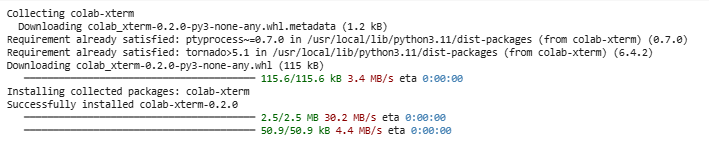

In [2]:
%xterm


Launching Xterm...

<IPython.core.display.Javascript object>

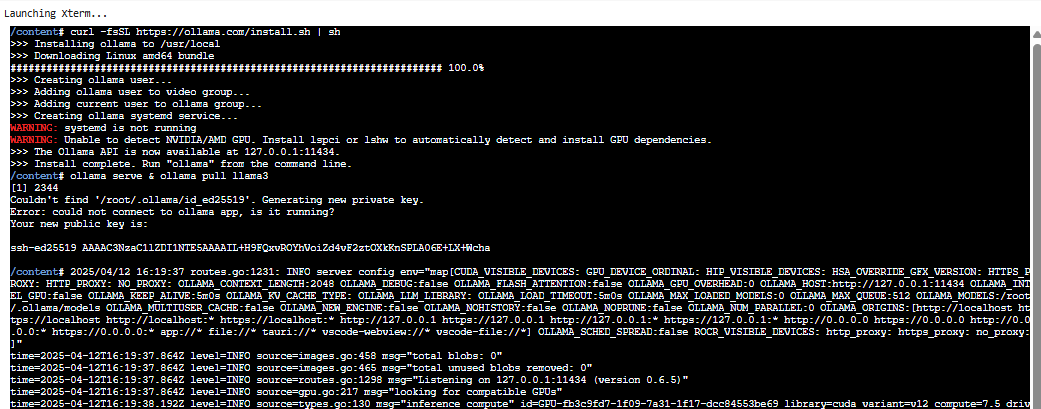

In [3]:
!pip install langchain faiss-cpu sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

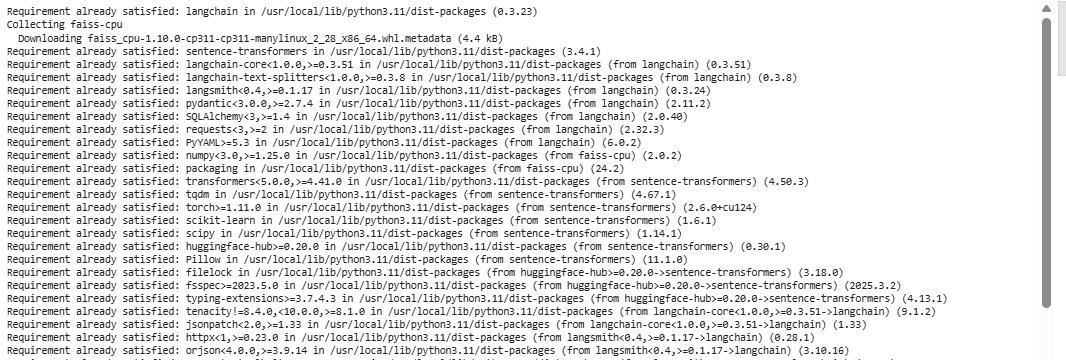

In [5]:
!pip install chromadb  -qqq   # <<-- Asegúrate de instalar chromadb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.4/188.4 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 5.9 MB/s eta 0:00:

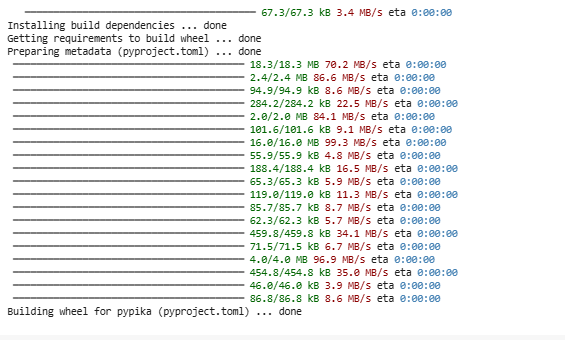

In [6]:
from langchain_community.llms import Ollama
from langchain.chains import RetrievalQA
from langchain.vectorstores import Chroma
from sentence_transformers import SentenceTransformer
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.docstore.document import Document

# Initialize the Llama 3 model
llm = Ollama(model="llama3")

# Create an embedding model
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

# Prepare documents
documents = [
    Document(page_content="The capital of Florida is Tallahassee.", metadata={"id": 0}),
    Document(page_content="Florida is known for its beautiful beaches and warm climate.", metadata={"id": 1}),
    Document(page_content="The largest city in Florida by population is Jacksonville.", metadata={"id": 2}),
    Document(page_content="The President of Miami Dade College is President Madeline Pumariega.", metadata={"id": 3}),
    Document(page_content="The Provost of Miami Dade College is Dr. Malou C. Harrison.", metadata={"id": 4}),
    Document(page_content="Dr. Ernesto Lee is an AI and Data Analytics Professor on the Kendall Campus at Miami Dade College.", metadata={"id": 5})
]

# Create Chroma vector store
vector_store = Chroma.from_documents(documents, embedding=embeddings)

# Load the QA chain
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=vector_store.as_retriever()
)

In [7]:
# Use the QA chain to retrieve relevant documents and generate a response
queries = [
    "What is the capital of Florida?",
    "Who is the President of Miami Dade College?",
    "Who is the Provost of Miami Dade College?",
    "Who is Dr. Ernesto Lee?"
]

for query in queries:
    response = qa_chain.run(query)
    print(f"Query: {query}\nResponse: {response}\n")

<ipython-input-7-14745d6f13e4>:10: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = qa_chain.run(query)


Query: What is the capital of Florida?
Response: According to the context, the capital of Florida is Tallahassee.

Query: Who is the President of Miami Dade College?
Response: According to the provided context, the President of Miami Dade College is President Madeline Pumariega.

Query: Who is the Provost of Miami Dade College?
Response: According to the context, the Provost of Miami Dade College is Dr. Malou C. Harrison.

Query: Who is Dr. Ernesto Lee?
Response: Dr. Ernesto Lee is an AI and Data Analytics Professor on the Kendall Campus at Miami Dade College.



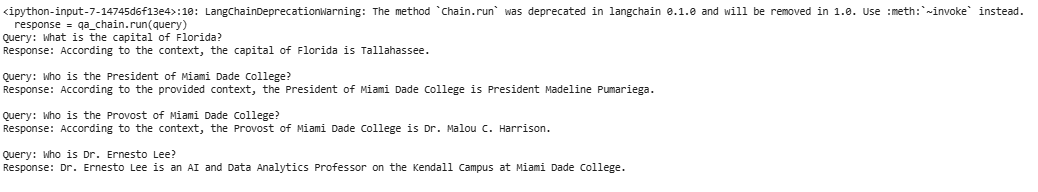

In [8]:
from langchain.chains import load_summarize_chain


In [9]:
# Load the summarization chain
summarization_chain = load_summarize_chain(llm=llm, chain_type="map_reduce")

# Summarize a long text
long_text = """
Florida is a state located in the southeastern region of the United States. It is bordered by Alabama to the northwest, Georgia to the north, the Gulf of Mexico to the west, and the Atlantic Ocean to the east. Tallahassee is the state capital, and Jacksonville is the largest city by population. Florida is known for its diverse wildlife, beautiful beaches, and warm climate, making it a popular destination for tourists.
"""
summary = summarization_chain({"input_documents": [Document(page_content=long_text)]})
print(summary)

<ipython-input-9-59f8f97224f9>:8: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  summary = summarization_chain({"input_documents": [Document(page_content=long_text)]})


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

{'input_documents': [Document(metadata={}, page_content='\nFlorida is a state located in the southeastern region of the United States. It is bordered by Alabama to the northwest, Georgia to the north, the Gulf of Mexico to the west, and the Atlantic Ocean to the east. Tallahassee is the state capital, and Jacksonville is the largest city by population. Florida is known for its diverse wildlife, beautiful beaches, and warm climate, making it a popular destination for tourists.\n')], 'output_text': "Florida is a southeastern US state bordering Alabama, Georgia, the Gulf of Mexico, and the Atlantic Ocean. It's famous for its wildlife, beaches, and warm climate, making it a top tourist destination."}


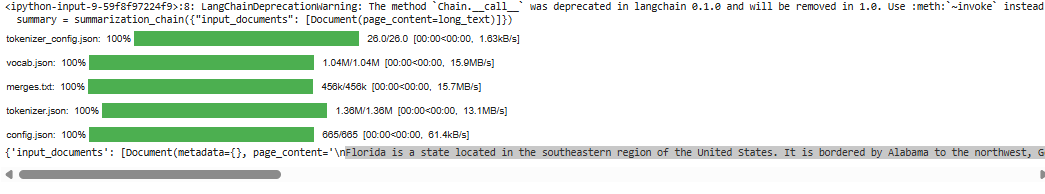